In [1]:
import numpy as np
import pandas as pd
#for random selection of photo pixels
import random
#to open images
import PIL
from PIL import Image
import cv2
#for ploting
import matplotlib.pyplot as plt
import seaborn as sns
#to calculate psnr
import math

#Image Segmentation of Leukemia Cells (Random Selection)

In [4]:
#We use this function to replace each pixel with the closest pixel we have selected.
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

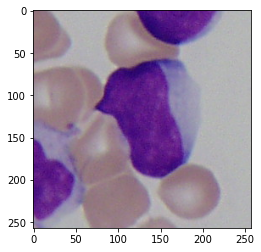

In [5]:
im = Image.open('Im007_1.tif')
plt.imshow(im)

In [6]:
rbgMatrix = np.squeeze(im, axis=None)
line1 = random.choice(rbgMatrix)
line2 = random.choice(rbgMatrix)
line3 = random.choice(rbgMatrix)
pxl1 = random.choice(line1)
pxl2 = random.choice(line2)
pxl3 = random.choice(line3)

In [7]:
gray1 = pxl1[0]*0.299 + pxl1[1]*0.587 + pxl1[2]*0.114
gray2 = pxl2[0]*0.299 + pxl2[1]*0.587 + pxl2[2]*0.114
gray3 = pxl3[0]*0.299 + pxl3[1]*0.587 + pxl3[2]*0.114

In [8]:
my_list = []
for i in rbgMatrix:
  for j in i:
    jGray = j[0]*0.299 + j[1]*0.587 + j[2]*0.114
    U = [round(gray1, 2), round(gray2, 2), round(gray3, 2)]
    o = find_nearest(U, jGray)
    if o == round(gray1, 2):
      my_list.append([pxl1[0],pxl1[1],pxl1[2]])
    elif o == round(gray2, 2):
      my_list.append([pxl2[0],pxl2[1],pxl2[2]])
    elif o == round(gray3, 2):
      my_list.append([pxl3[0],pxl3[1],pxl3[2]])
arrays = np.array(my_list)
myRBG = np.reshape(arrays,np.shape(rbgMatrix))

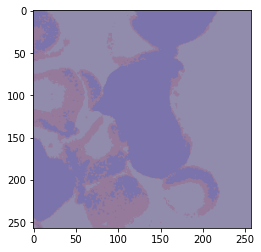

In [9]:
img1 = Image.fromarray(myRBG , 'RGB')
plt.imshow(img1)

In [10]:
img1 = rbgMatrix.astype(np.float64) / 255.
img2 = myRBG.astype(np.float64) / 255.
mse = np.mean((img1 - img2) ** 2)
psnr = 10 * math.log10(1. / mse)
psnr

17.20022366349462

#Genetic Algorithm

In [11]:
def initial_population(rbgMatrix, POPULATION):
  population = []
  for p in range(POPULATION):
    line1 = random.choice(rbgMatrix)
    line2 = random.choice(rbgMatrix)
    line3 = random.choice(rbgMatrix)
    pxl1 = random.choice(line1)
    pxl2 = random.choice(line2)
    pxl3 = random.choice(line3)
    gray1 = pxl1[0]*0.299 + pxl1[1]*0.587 + pxl1[2]*0.114
    gray2 = pxl2[0]*0.299 + pxl2[1]*0.587 + pxl2[2]*0.114
    gray3 = pxl3[0]*0.299 + pxl3[1]*0.587 + pxl3[2]*0.114
    my_list = []
    for i in rbgMatrix:
      for j in i:
        jGray = j[0]*0.299 + j[1]*0.587 + j[2]*0.114
        U = [round(gray1, 2), round(gray2, 2), round(gray3, 2)]
        o = find_nearest(U, jGray)
        if o == round(gray1, 2):
          my_list.append([pxl1[0],pxl1[1],pxl1[2]])
        elif o == round(gray2, 2):
          my_list.append([pxl2[0],pxl2[1],pxl2[2]])
        elif o == round(gray3, 2):
          my_list.append([pxl3[0],pxl3[1],pxl3[2]])
    arrays = np.array(my_list)
    myRBG = np.reshape(arrays,np.shape(rbgMatrix))
    img1 = rbgMatrix.astype(np.float64) / len(rbgMatrix)
    img2 = myRBG.astype(np.float64) / len(rbgMatrix)
    mse = np.mean((img1 - img2) ** 2)
    psnr = 10 * math.log10(1. / mse)
    my_array = [pxl1,pxl2,pxl3,psnr]
    population.append(my_array)
  df1 = pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR'])
  df2 = df1.sort_values(by=['PSNR'],ascending = False)
  population = np.array(df2)
  return population

In [12]:
def fitness(population,rbgMatrix):
  df1 = pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR'])
  for index, row in df1.iterrows():
    if df1['PSNR'][index] == 0:
      pxl1 = df1['pxl1'][index]
      pxl2 = df1['pxl2'][index]
      pxl3 = df1['pxl3'][index]
      gray1 = pxl1[0]*0.299 + pxl1[1]*0.587 + pxl1[2]*0.114
      gray2 = pxl2[0]*0.299 + pxl2[1]*0.587 + pxl2[2]*0.114
      gray3 = pxl3[0]*0.299 + pxl3[1]*0.587 + pxl3[2]*0.114
      my_list = []
      for i in rbgMatrix:
        for j in i:
          jGray = j[0]*0.299 + j[1]*0.587 + j[2]*0.114
          U = [round(gray1, 2), round(gray2, 2), round(gray3, 2)]
          o = find_nearest(U, jGray)
          if o == round(gray1, 2):
            my_list.append([pxl1[0],pxl1[1],pxl1[2]])
          elif o == round(gray2, 2):
            my_list.append([pxl2[0],pxl2[1],pxl2[2]])
          elif o == round(gray3, 2):
            my_list.append([pxl3[0],pxl3[1],pxl3[2]])
      arrays = np.array(my_list)
      myRBG = np.reshape(arrays,np.shape(rbgMatrix))
      img1 = rbgMatrix.astype(np.float64) / len(rbgMatrix)
      img2 = myRBG.astype(np.float64) / len(rbgMatrix)
      mse = np.mean((img1 - img2) ** 2)
      psnr = 10 * math.log10(1. / mse)
      df1['PSNR'][index] = psnr
  df2 = df1.sort_values(by=['PSNR'],ascending = False)
  population = np.array(df2)
  return(population)

In [13]:
def cross_over(population,number):
  population1 = (population[:,0:3])
  population = list(population)
  for i in range(number):
    pxl1 = random.choice(random.choice(population1))
    pxl2 = random.choice(random.choice(population1))
    pxl3 = random.choice(random.choice(population1))
    my_array = [pxl1,pxl2,pxl3]
    my_array.append(0)
    population.append(my_array)
  population = np.array(population)
  return population

In [14]:
def mutation(population,rbg_matrix,number):
  population = list(population)
  for i in range(number):
    line1 = random.choice(rbg_matrix)
    line2 = random.choice(rbg_matrix)
    line3 = random.choice(rbg_matrix)
    pxl1 = random.choice(line1)
    pxl2 = random.choice(line2)
    pxl3 = random.choice(line3)
    my_array = [pxl1,pxl2,pxl3,0]
    population.append(my_array)
  population = np.array(population)
  return population

In [15]:
def eliminate(population,number):
  population = pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR'])
  population.drop(population.tail(number).index,inplace=True)
  population = np.array(population)
  return population

#Algorithm Implementation

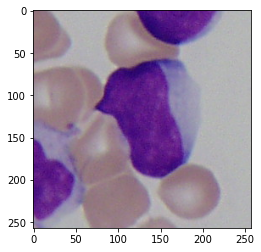

In [18]:
#reading the image
im = Image.open('Im007_1.tif')
rbgMatrix = np.squeeze(im, axis=None)
plt.imshow(im)

In [21]:
#running the algorithm
population = initial_population(rbgMatrix, 10)
print(pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR']))
print('-----------------------------------------------------------------')
for stopping_criterion in range(8):
  population = cross_over(population,3)
  population = mutation(population,rbgMatrix,2)
  population = fitness(population,rbgMatrix)
  population = eliminate(population,5)
  print(pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR']))
  print('-----------------------------------------------------------------')

              pxl1             pxl2             pxl3       PSNR
0    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
1    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
2  [177, 176, 182]    [75, 18, 133]    [61, 15, 123]  19.197625
3  [180, 181, 183]    [79, 22, 137]  [179, 177, 182]  19.108067
4  [150, 123, 128]   [107, 38, 145]  [154, 122, 137]  18.921518
5  [137, 113, 127]  [177, 176, 182]  [180, 180, 180]  18.674363
6  [146, 121, 125]    [91, 25, 135]  [143, 117, 130]  17.984621
7   [120, 76, 135]  [149, 125, 125]  [149, 115, 131]  17.418708
8  [165, 168, 175]  [129, 127, 174]  [180, 181, 183]  17.240244
9  [180, 178, 181]  [183, 183, 183]  [179, 177, 182]   13.13942
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
1    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
2  [177, 176, 182]    [75, 18, 133]    [61, 15, 123]  19.197625
3   [106, 39, 144]   [103, 52, 147]  [183, 181, 182]  19.131904
4  [180, 181, 183]    [79, 22, 137]  [179, 177, 182]  19.108067
5  [150, 123, 128]   [107, 38, 145]  [154, 122, 137]  18.921518
6  [137, 113, 127]  [177, 176, 182]  [180, 180, 180]  18.674363
7  [140, 113, 130]    [79, 22, 137]  [150, 123, 128]  18.458269
8  [146, 121, 125]    [91, 25, 135]  [143, 117, 130]  17.984621
9  [150, 123, 128]  [150, 123, 128]  [179, 177, 182]  17.767793
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
1  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
2    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
3    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
4  [151, 122, 124]  [176, 178, 175]  [127, 108, 136]  19.463974
5  [177, 176, 182]    [75, 18, 133]    [61, 15, 123]  19.197625
6   [106, 39, 144]   [103, 52, 147]  [183, 181, 182]  19.131904
7  [180, 181, 183]    [79, 22, 137]  [179, 177, 182]  19.108067
8  [150, 123, 128]   [107, 38, 145]  [154, 122, 137]  18.921518
9  [137, 113, 127]  [177, 176, 182]  [180, 180, 180]  18.674363
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
2  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
3  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
4    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
5    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
6  [151, 122, 124]  [176, 178, 175]  [127, 108, 136]  19.463974
7  [177, 176, 182]    [75, 18, 133]    [61, 15, 123]  19.197625
8   [106, 39, 144]   [103, 52, 147]  [183, 181, 182]  19.131904
9  [180, 181, 183]    [79, 22, 137]  [179, 177, 182]  19.108067
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
2  [177, 176, 182]  [150, 123, 128]   [106, 39, 144]  24.956863
3  [179, 177, 182]   [103, 52, 147]  [150, 127, 137]  24.895709
4  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
5  [144, 116, 115]  [168, 155, 164]    [76, 16, 129]  23.349413
6  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
7    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
8    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
9  [151, 122, 124]  [176, 178, 175]  [127, 108, 136]  19.463974
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
2  [177, 176, 182]  [150, 123, 128]   [106, 39, 144]  24.956863
3  [179, 177, 182]   [103, 52, 147]  [150, 127, 137]  24.895709
4  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
5  [144, 116, 115]  [168, 155, 164]    [76, 16, 129]  23.349413
6  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
7    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
8    [77, 23, 135]  [140, 113, 130]  [157, 131, 134]  19.700247
9  [151, 122, 124]  [176, 178, 175]  [127, 108, 136]  19.463974
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
2  [177, 176, 182]  [150, 123, 128]   [106, 39, 144]  24.956863
3  [179, 177, 182]   [103, 52, 147]  [150, 127, 137]  24.895709
4  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
5    [78, 15, 129]  [127, 108, 136]  [177, 176, 182]  24.274798
6  [144, 116, 115]  [168, 155, 164]    [76, 16, 129]  23.349413
7  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
8  [150, 123, 128]   [106, 39, 144]  [160, 138, 151]  21.365325
9    [78, 15, 129]  [183, 180, 189]  [178, 167, 171]  20.388608
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1    [78, 15, 129]  [177, 176, 182]  [150, 123, 128]  25.289126
2  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
3  [177, 176, 182]  [150, 123, 128]   [106, 39, 144]  24.956863
4  [179, 177, 182]   [103, 52, 147]  [150, 127, 137]  24.895709
5  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
6    [78, 15, 129]  [127, 108, 136]  [177, 176, 182]  24.274798
7  [144, 116, 115]  [168, 155, 164]    [76, 16, 129]  23.349413
8  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
9  [150, 123, 128]   [106, 39, 144]  [160, 138, 151]  21.365325
-----------------------------------------------------------------


<ipython-input-13-b1392be01bd7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)
<ipython-input-14-f9597b25a2f2>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  population = np.array(population)


              pxl1             pxl2             pxl3       PSNR
0  [177, 176, 182]  [150, 127, 137]   [106, 39, 144]  25.520524
1    [78, 15, 129]  [177, 176, 182]  [150, 123, 128]  25.289126
2  [177, 176, 182]   [106, 39, 144]  [150, 123, 128]  24.956863
3  [177, 176, 182]  [150, 123, 128]   [106, 39, 144]  24.956863
4  [179, 177, 182]   [103, 52, 147]  [150, 127, 137]  24.895709
5  [150, 123, 128]    [61, 15, 123]  [177, 176, 182]  24.307392
6    [78, 15, 129]  [127, 108, 136]  [177, 176, 182]  24.274798
7  [144, 116, 115]  [168, 155, 164]    [76, 16, 129]  23.349413
8  [160, 138, 151]    [91, 22, 131]  [150, 127, 137]  21.707986
9  [150, 123, 128]   [106, 39, 144]  [160, 138, 151]  21.365325
-----------------------------------------------------------------


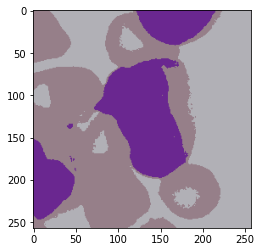

In [22]:
#implementation
population = pd.DataFrame(population,columns=['pxl1','pxl2','pxl3','PSNR'])

pxl1 = population['pxl1'][0]
pxl2 = population['pxl2'][0]
pxl3 = population['pxl3'][0]

gray1 = pxl1[0]*0.299 + pxl1[1]*0.587 + pxl1[2]*0.114
gray2 = pxl2[0]*0.299 + pxl2[1]*0.587 + pxl2[2]*0.114
gray3 = pxl3[0]*0.299 + pxl3[1]*0.587 + pxl3[2]*0.114

my_list = []
for i in rbgMatrix:
  for j in i:
    jGray = j[0]*0.299 + j[1]*0.587 + j[2]*0.114
    U = [round(gray1, 2), round(gray2, 2), round(gray3, 2)]
    o = find_nearest(U, jGray)
    if o == round(gray1, 2):
      my_list.append([pxl1[0],pxl1[1],pxl1[2]])
    elif o == round(gray2, 2):
      my_list.append([pxl2[0],pxl2[1],pxl2[2]])
    elif o == round(gray3, 2):
      my_list.append([pxl3[0],pxl3[1],pxl3[2]])
arrays = np.array(my_list)
myRBG = np.reshape(arrays,np.shape(rbgMatrix))

img1 = Image.fromarray(myRBG , 'RGB')
plt.imshow(img1)

#Histograms

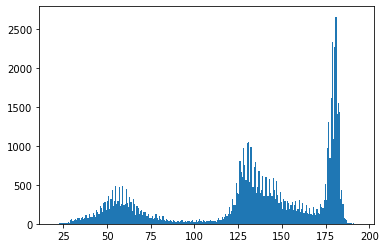

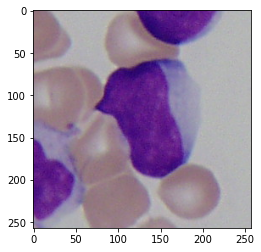

In [37]:
mylist = []
for j in rbgMatrix:
  for i in j:
    a = i[0]*0.299 + i[1]*0.587 + i[2]*0.114
    mylist.append(a)

b, bins, patches = plt.hist(mylist, len(rbgMatrix))
plt.show()
img = Image.fromarray(rbgMatrix , 'RGB')
plt.imshow(img)

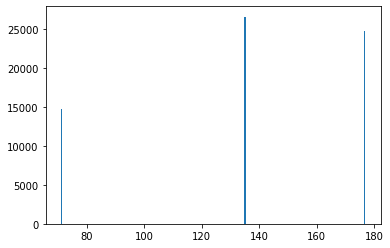

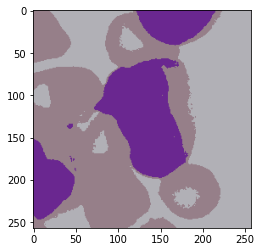

In [36]:
mylist1 = []
for j in myRBG:
  for i in j:
    a = i[0]*0.299 + i[1]*0.587 + i[2]*0.114
    mylist1.append(a)

b, bins, patches = plt.hist(mylist1, len(rbgMatrix))
plt.show()
img1 = Image.fromarray(myRBG , 'RGB')
plt.imshow(img1)